<a href="https://colab.research.google.com/github/AKASH-C-P/BusinessMODEL/blob/main/SIMS_Prohpet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np


In [ ]:
file_path = 'stores_sales_forecasting.csv'
sales_data = pd.read_csv(file_path, encoding='ISO-8859-1')

sales_data_info = sales_data.info()
sales_data_head = sales_data.head()
sales_data_missing = sales_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [ ]:
sales_data_head

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [ ]:
sales_data_missing

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], errors='coerce')
sales_data['Ship Date'] = pd.to_datetime(sales_data['Ship Date'], errors='coerce')

daily_sales = sales_data.groupby('Order Date')['Quantity'].sum().reset_index()

daily_sales.head()

,Order Date,Quantity
0,2014-01-06,9
1,2014-01-07,3
2,2014-01-10,1
3,2014-01-11,2
4,2014-01-13,9


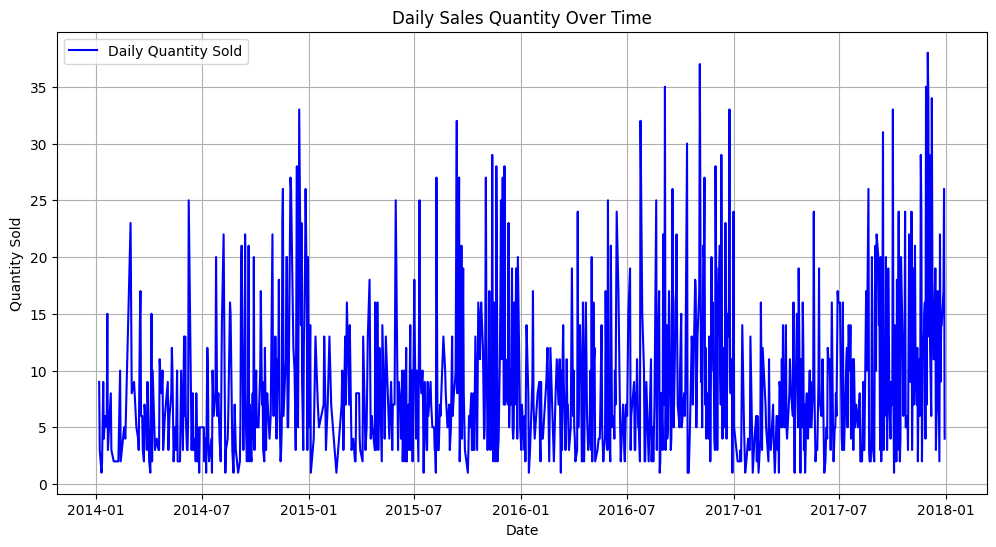

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Order Date'], daily_sales['Quantity'], label='Daily Quantity Sold', color='b')
plt.title('Daily Sales Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid()
plt.show()

In [ ]:
daily_sales['Order Date'] = pd.to_datetime(daily_sales['Order Date'])
daily_sales.set_index('Order Date', inplace=True)
weekly_sales = daily_sales['Quantity'].resample('W').sum()

In [ ]:
prophet_data = weekly_sales.reset_index()
prophet_data.columns = ['ds', 'y']

In [ ]:
model = Prophet()

model.fit(prophet_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1gnxufvv/t78btmy2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1gnxufvv/ry_nayph.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16315', 'data', 'file=/tmp/tmp1gnxufvv/t78btmy2.json', 'init=/tmp/tmp1gnxufvv/ry_nayph.json', 'output', 'file=/tmp/tmp1gnxufvv/prophet_modelh3_vok8c/prophet_model-20241018083040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:30:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:30:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

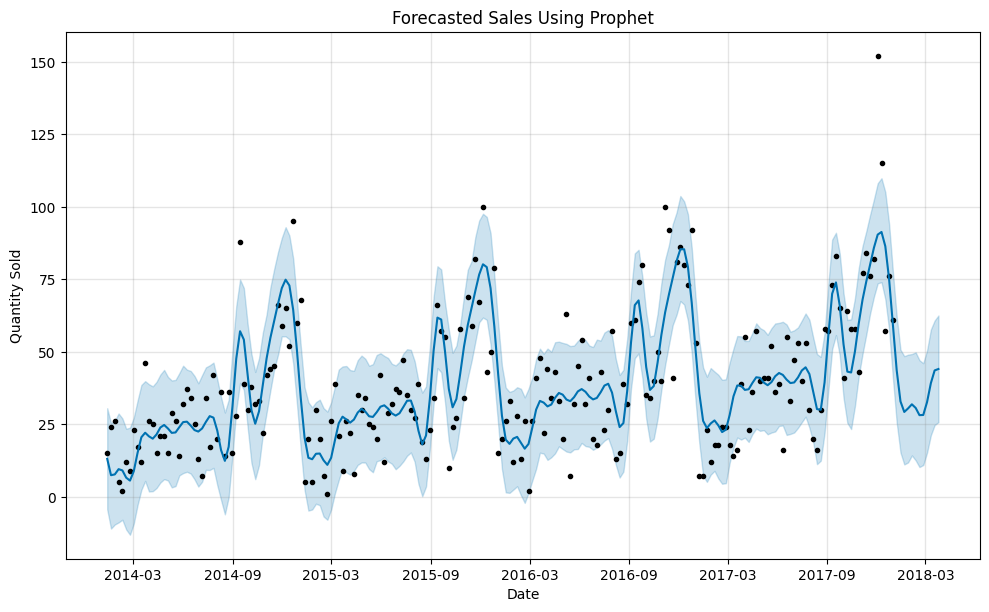

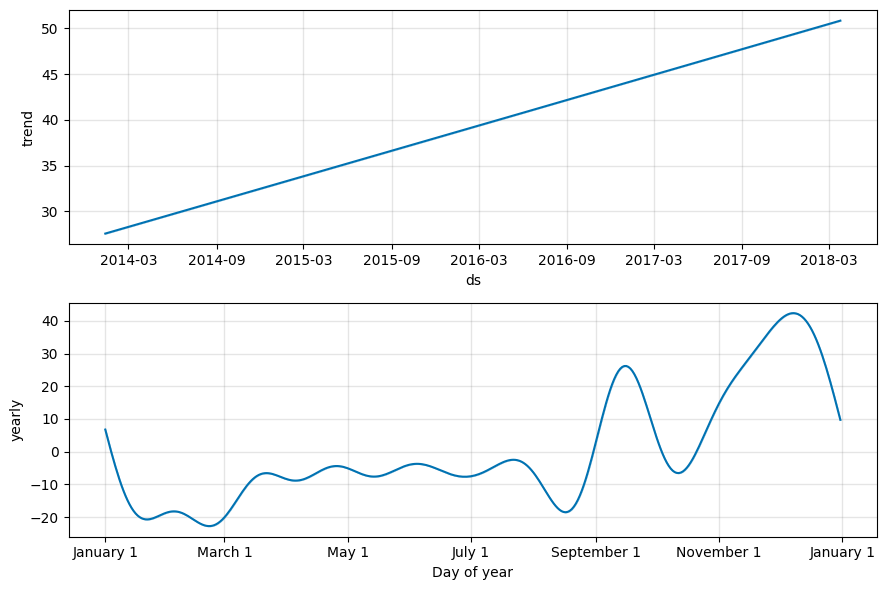

In [ ]:
fig = model.plot(forecast)
plt.title('Forecasted Sales Using Prophet')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()

fig2 = model.plot_components(forecast)
plt.show()


In [ ]:

# Calculate MSE and RMSE
mse_prophet = mean_squared_error(prophet_data['y'], forecast['yhat'][:len(prophet_data)])
rmse_prophet = np.sqrt(mse_prophet)
print(f'Mean Squared Error (Prophet): {mse_prophet}')
print(f'Root Mean Squared Error (Prophet): {rmse_prophet}')


Mean Squared Error (Prophet): 196.5769818571906
Root Mean Squared Error (Prophet): 14.020591351907758


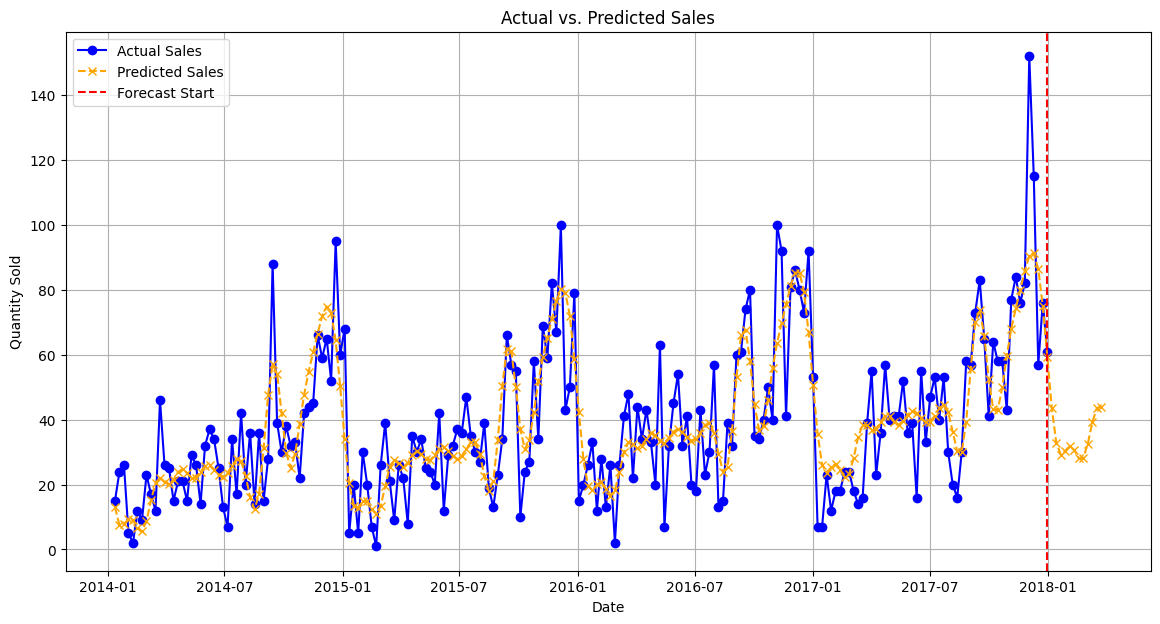

In [ ]:
import matplotlib.pyplot as plt

# Prepare the actual sales data
actual_sales = prophet_data.set_index('ds')

# Prepare the predicted sales data
predicted_sales = forecast[['ds', 'yhat']].set_index('ds')

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(actual_sales.index, actual_sales['y'], label='Actual Sales', color='blue', marker='o')
plt.plot(predicted_sales.index, predicted_sales['yhat'], label='Predicted Sales', color='orange', linestyle='--', marker='x')

# Highlight the forecast period
plt.axvline(x=actual_sales.index[-1], color='red', linestyle='--', label='Forecast Start')

# Add titles and labels
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid()
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1gnxufvv/mfcnxxgi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1gnxufvv/pmjr1w2_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11062', 'data', 'file=/tmp/tmp1gnxufvv/mfcnxxgi.json', 'init=/tmp/tmp1gnxufvv/pmjr1w2_.json', 'output', 'file=/tmp/tmp1gnxufvv/prophet_modeluzo7wqu2/prophet_model-20241018085532.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:55:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

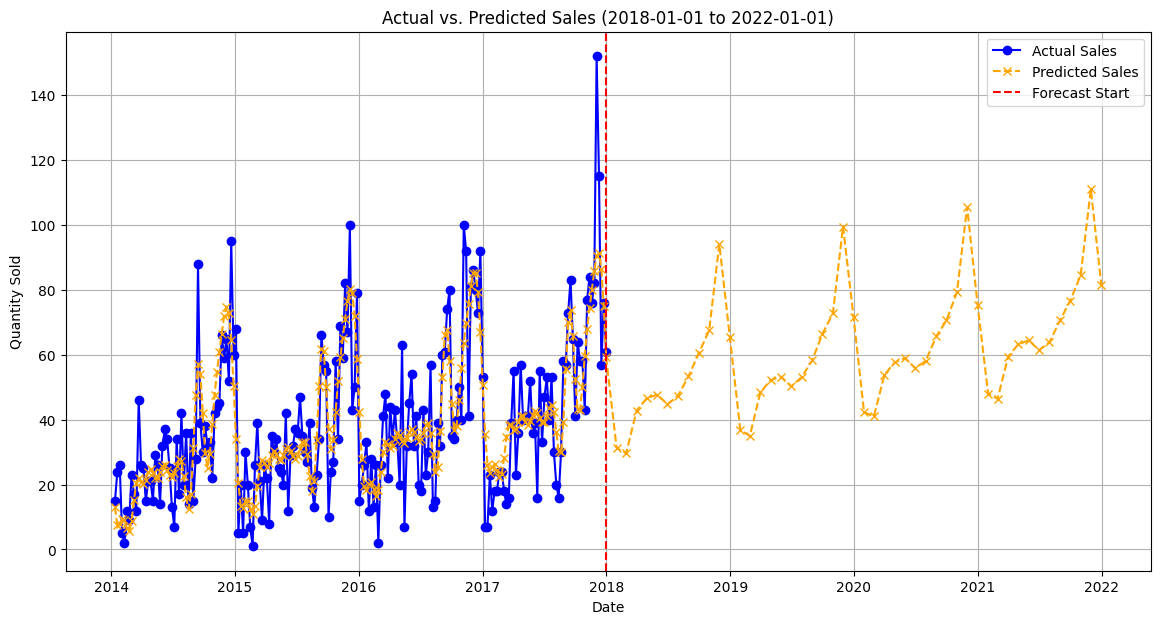

In [ ]:
-

# Load the data (assuming 'prophet_data' is already loaded as a DataFrame)
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'])

# Filter the data up to January 1, 2018, for training
training_data = prophet_data[prophet_data['ds'] < '2018-01-01']

# Initialize and fit the Prophet model
model = Prophet()
model.fit(training_data)

# Create a future DataFrame to forecast from January 1, 2018, to January 1, 2022
future = model.make_future_dataframe(periods=48, freq='M')  # 48 months = 4 years

# Generate the forecast
forecast = model.predict(future)

# Prepare actual sales data
actual_sales = prophet_data.set_index('ds')

# Prepare predicted sales data
predicted_sales = forecast[['ds', 'yhat']].set_index('ds')

# Filter forecast to get predictions from January 1, 2018, to January 1, 2022
forecast_period = forecast[(forecast['ds'] >= '2018-01-01') & (forecast['ds'] <= '2022-01-01')]

# Plotting
plt.figure(figsize=(14, 7))

# Plot actual sales before January 1, 2018
plt.plot(actual_sales.index, actual_sales['y'], label='Actual Sales', color='blue', marker='o')

# Plot predicted sales for the period 2018-2022
plt.plot(predicted_sales.index, predicted_sales['yhat'], label='Predicted Sales', color='orange', linestyle='--', marker='x')

# Highlight the forecast start
plt.axvline(x=pd.to_datetime('2018-01-01'), color='red', linestyle='--', label='Forecast Start')

# Add titles and labels
plt.title('Actual vs. Predicted Sales (2018-01-01 to 2022-01-01)')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid()

# Show the plot
plt.show()
